<a href="https://colab.research.google.com/github/amirhosseinzinati/Estimating-Fish-Weight-Using-Linear-Regression/blob/main/FishRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load Dataset


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML-Project/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
# Check For Missing Values
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.insert(4,"Min",df.min(),True)
info.insert(5,"Max",df.max(),True)
info.T    

,Species,Weight,Length1,Length2,Length3,Height,Width
IsNull,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0
Unique,7,101,116,93,124,154,152
Min,Bream,0.0,7.5,8.4,8.8,1.7284,1.0476
Max,Whitefish,1650.0,59.0,63.4,68.0,18.957,8.142


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# Preproccessing

<Axes: xlabel='Weight', ylabel='Length1'>

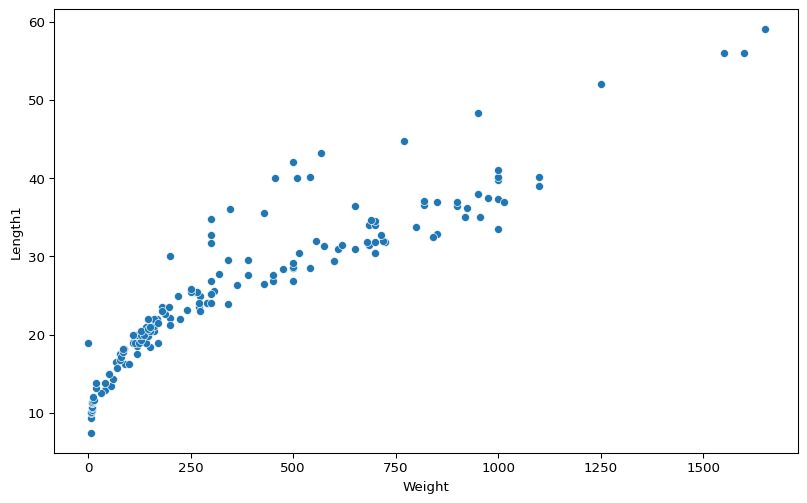

In [13]:
plt.figure(figsize=(10,6),dpi=96)
sns.scatterplot(data= df, x="Weight",y="Length1")

<Axes: xlabel='Weight', ylabel='Length2'>

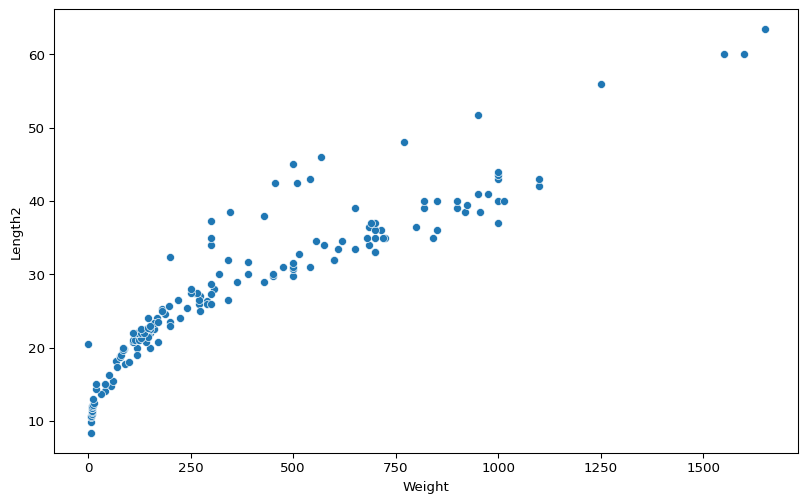

In [14]:
plt.figure(figsize=(10,6),dpi=96)
sns.scatterplot(data= df, x="Weight",y="Length2")

<Axes: xlabel='Weight', ylabel='Length3'>

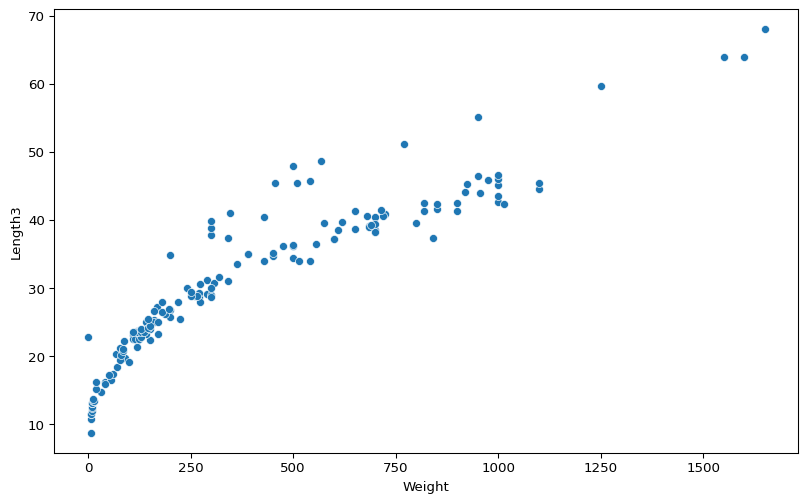

In [15]:
plt.figure(figsize=(10,6),dpi=96)
sns.scatterplot(data= df, x="Weight",y="Length3")

<Axes: xlabel='Weight', ylabel='Height'>

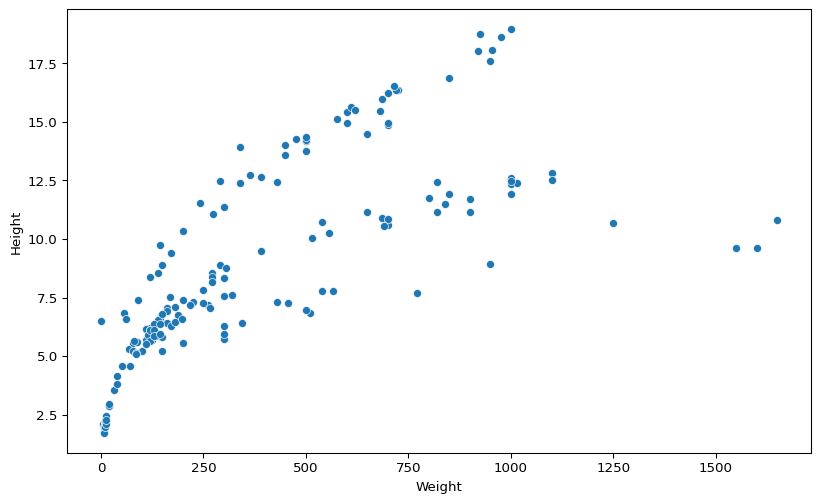

In [16]:
plt.figure(figsize=(10,6),dpi=96)
sns.scatterplot(data= df, x="Weight",y="Height")

<Axes: xlabel='Weight', ylabel='Width'>

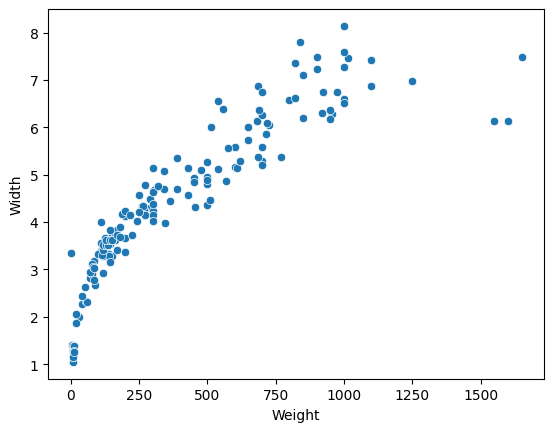

In [17]:
sns.scatterplot(data= df, x="Weight",y="Width")

<Figure size 1500x600 with 0 Axes>

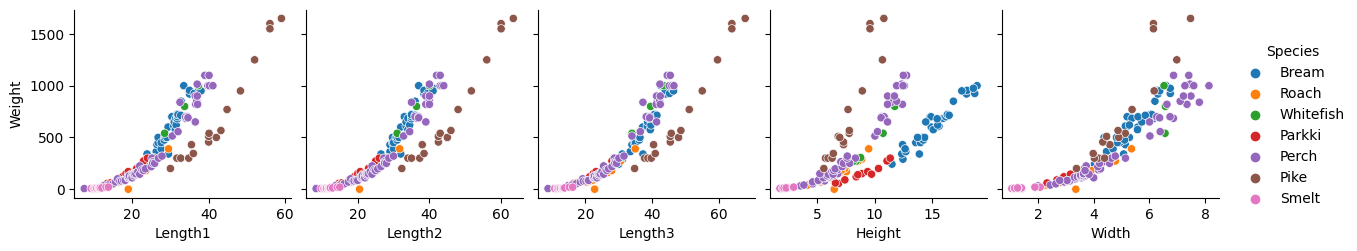

In [18]:
plt.figure(figsize=(15,6))
sns.pairplot(data= df,
             x_vars = ['Length1','Length2','Length3','Height','Width'],
             y_vars = 'Weight', 
             hue = 'Species')
plt.show()

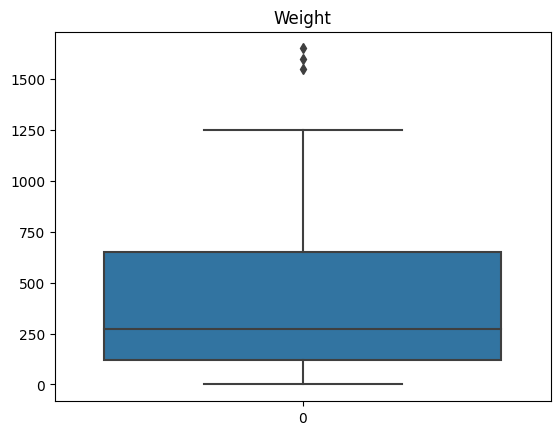

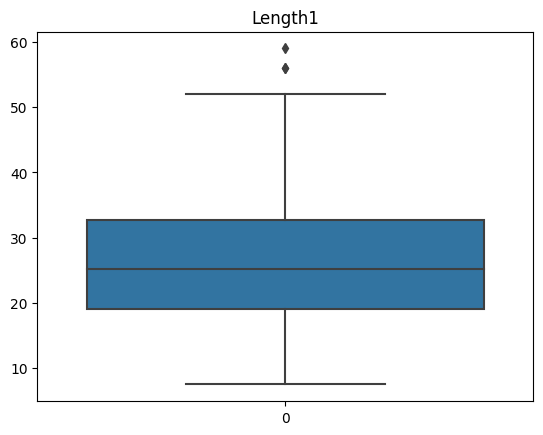

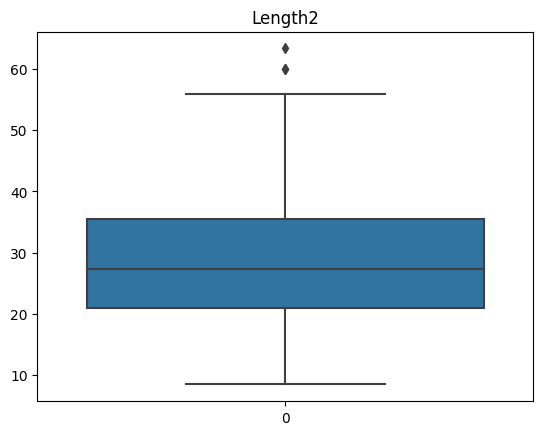

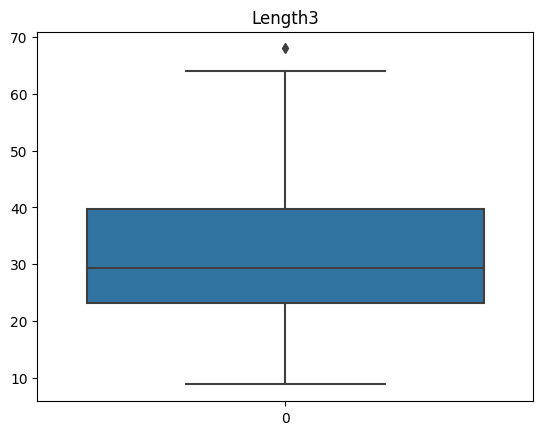

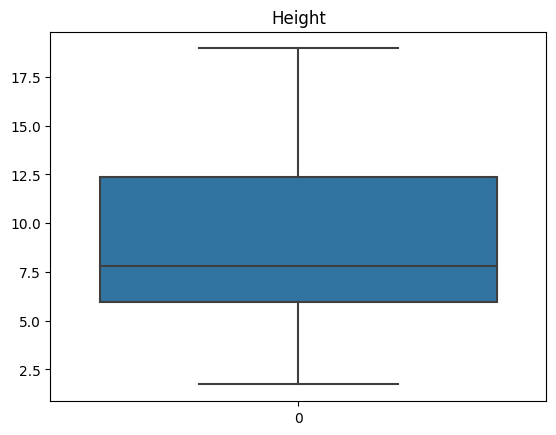

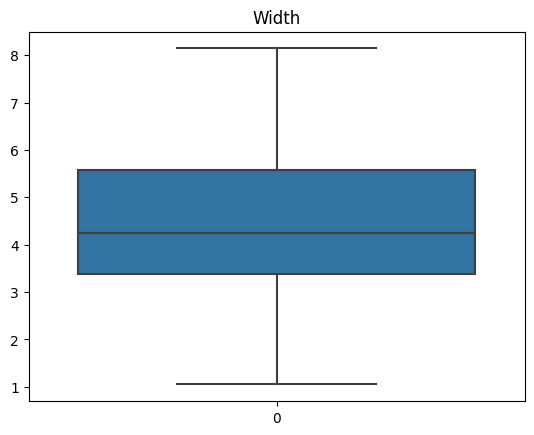

In [19]:
df1= df.drop(columns=['Species'])
for col in df1:
    plt.title(col)
    sns.boxplot(df1[col])
    plt.show()

In [20]:
noise_weight=df[(df['Weight'] >1500)]
noise_length1=df[(df['Length1'] >54)]
noise_length2=df[(df['Length2'] >57)]
noise_length3=df[(df['Length3'] >65)]

In [21]:
noise_weight

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [22]:
noise_length1

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [23]:
noise_length2

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [24]:
noise_length3

,Species,Weight,Length1,Length2,Length3,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.48


In [25]:
df.drop(noise_weight.index)
df.drop(noise_length3.index)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<ipython-input-26-6cec76a068e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


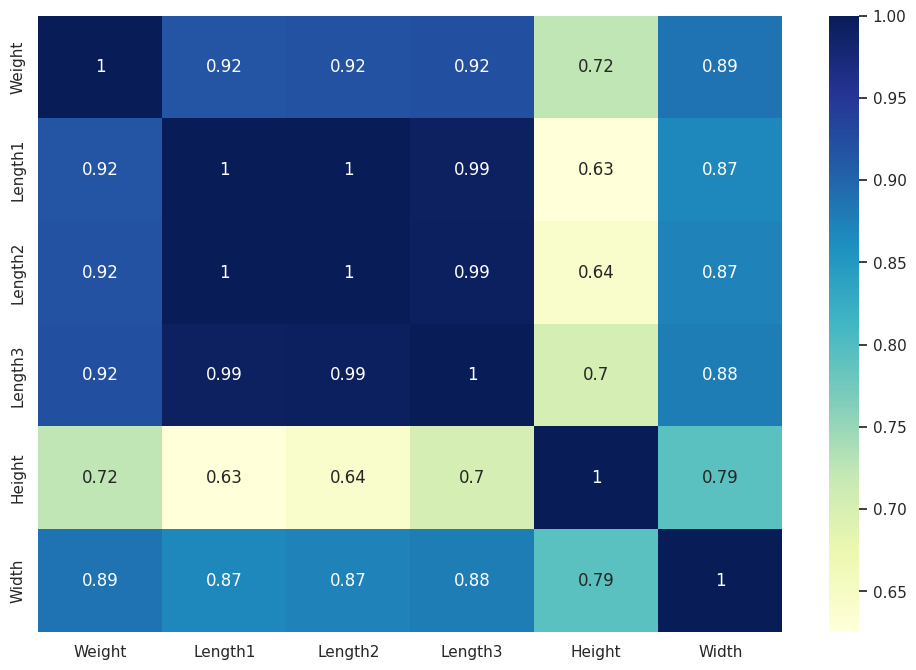

In [26]:
sns.set(rc={'figure.figsize':(12,8)})
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Convert Species To Dummy

In [27]:
df1 = df.copy()
df1 = pd.get_dummies(df1)
df1

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [28]:
df1 =df1.drop(columns=['Species_Bream'],axis=1)
df1

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


# Modeling

In [29]:
def Modeling(X_train,y_train,X_test,y_test,scaling=True,detail=True):
    if scaling==True:
        st =MinMaxScaler()
        X_train = st.fit_transform(X_train)
        X_test = st.fit_transform(X_test)
    # Make Model
    regressor = LinearRegression()
    # Fit Model
    regressor.fit(X_train,y_train)
    # Prediction
    y_pred = regressor.predict(X_test)
    # Result
    if detail == True:
        print("===================================> Shape <===================================")
        print("Scaling Is  = ",scaling)
        print('X_train: ', np.shape(X_train))
        print('y_train: ', np.shape(y_train))
        print('X_test: ', np.shape(X_test))
        print('y_test: ', np.shape(y_test))
        print("================================> Model Result <================================")
        print("Intercept = ",regressor.intercept_)
        print("Slope = ",regressor.coef_)
        print("===================================> Result <===================================")
        print("ModelScore                     = ",regressor.score(X_test,y_test))
        print("Mean Absolute Error (MAE)      = ",metrics.mean_absolute_error(y_test,y_pred))
        print("Mean Squared Error (MSE)       = ",metrics.mean_squared_error(y_test,y_pred))
        print("Root Mean Squared Error (RMSE) = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
        print("R2 Score                       = ",metrics.r2_score(y_test,y_pred))
        
    return metrics.r2_score(y_test,y_pred),y_pred

### Spliting Data

In [30]:
# Determaine X And Y
X = df1.drop(columns=['Length2','Weight'],axis=1)
y = df1['Weight'].values.reshape(-1,1)
# Split Data For Train And Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### Run Model

In [31]:
r2,_ = Modeling(X_train,y_train,X_test,y_test,True)

===================================> Shape <===================================
Scaling Is  =  True
X_train:  (127, 10)
y_train:  (127, 1)
X_test:  (32, 10)
y_test:  (32, 1)
================================> Model Result <================================
Intercept =  [-547.06021453]
Slope =  [[-1259.80471782  3468.83469328  -139.98573831   141.93295036
    177.85376403   147.36408716  -264.6144439     64.09418282
    395.59747991    70.17502241]]
===================================> Result <===================================
ModelScore                     =  0.9142995617642405
Mean Absolute Error (MAE)      =  85.37489840224538
Mean Squared Error (MSE)       =  11577.446741425912
Root Mean Squared Error (RMSE) =  107.59854432763443
R2 Score                       =  0.9142995617642405


# Improvement

### Using Kfold

In [32]:
Kfold_model = LinearRegression()
kfold_validation = KFold(5)

In [33]:
result = cross_val_score(Kfold_model , X,y,cv=kfold_validation,scoring='r2')
print("Result =",result)
print ("Result Mean = ",np.mean(result))

Result = [  0.22893169   0.09104334 -11.74210627   0.85156086  -0.01556935]
Result Mean =  -2.117227946958941


In [34]:
df3 = df1.drop(df.index[64:96])
df3


,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


In [35]:
# Determaine X And Y
X1 = df3.drop(columns={'Weight'},axis=1)
y1 = df3['Weight'].values.reshape(-1,1)
# Split Data For Train And Test
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [36]:
r2,y_pred = Modeling(X_train,y_train,X_test,y_test,True)

===================================> Shape <===================================
Scaling Is  =  True
X_train:  (101, 11)
y_train:  (101, 1)
X_test:  (26, 11)
y_test:  (26, 1)
================================> Model Result <================================
Intercept =  [-745.64469136]
Slope =  [[-2897.26866488  2609.19726158  2437.50247933   201.33693338
     78.59230665   453.35756589   180.25360023  -155.68496746
    257.101931     687.76962734   161.18067137]]
===================================> Result <===================================
ModelScore                     =  0.9405738415182293
Mean Absolute Error (MAE)      =  72.59056720484165
Mean Squared Error (MSE)       =  10219.257464846729
Root Mean Squared Error (RMSE) =  101.09034308402919
R2 Score                       =  0.9405738415182293


# Higher Dimention

In [37]:
def check(dim,size):
    r2 = 0.9405738415182293
    for col in X1:
        newCol = col + str(dim)
        newVal = X1[col] ** dim
        X1.insert(0 , newCol , newVal)
        
        x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(X1, y1, test_size=size, random_state=1)
        model2 = LinearRegression()
        model2.fit(x_train2 , y_train2)
        y_pred2= model2.predict(x_test2)
        _r2 = metrics.r2_score(y_test2,y_pred2)
        
        if _r2 < r2:
            X1.drop([newCol],axis = 1, inplace=True)
        else:
            r2 = _r2
    print('R2 = ' , r2)



In [38]:
check (2,0.2)

R2 =  0.9789598001885289


In [39]:
X1

,Species_Smelt2,Species_Perch2,Width2,Length12,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0,0,16.160400,538.24,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,0,0,18.538191,576.00,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,0,0,22.053355,571.21,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,0,0,19.851480,691.69,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,0,0,26.357956,702.25,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1,0,1.942121,132.25,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,1,0,1.610361,136.89,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,1,0,1.577034,146.41,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,1,0,4.273316,174.24,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


In [40]:
# Split Data For Train And Test
X1 = X1.drop(columns=['Species_Smelt2','Species_Perch2'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [41]:
r2,y_pred = Modeling(X_train,y_train,X_test,y_test,True)

===================================> Shape <===================================
Scaling Is  =  True
X_train:  (101, 13)
y_train:  (101, 1)
X_test:  (26, 13)
y_test:  (26, 1)
================================> Model Result <================================
Intercept =  [-295.96353702]
Slope =  [[  714.17604269  2270.195321   -1706.10776005 -1828.3103391
   2539.11182974   807.88160303  -590.61082696   160.63774945
    308.48941447   171.89013086   223.87522047   304.00282797
    275.75166549]]
===================================> Result <===================================
ModelScore                     =  0.9888132674076042
Mean Absolute Error (MAE)      =  30.179829837284462
Mean Squared Error (MSE)       =  1923.7336464741068
Root Mean Squared Error (RMSE) =  43.86038812498251
R2 Score                       =  0.9888132674076042


In [42]:
X_test.head()

,Width2,Length12,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
153,1.318823,129.96,11.4,12.0,13.2,2.2044,1.1484,0,0,0,0,1,0
46,11.055625,441.00,21.0,22.5,25.0,6.5500,3.3250,0,0,0,1,0,0
105,20.850182,645.16,25.4,27.5,28.9,7.2828,4.5662,0,1,0,0,0,0
122,43.956900,1376.41,37.1,40.0,42.5,11.1350,6.6300,0,1,0,0,0,0
135,19.882681,1600.00,40.0,42.5,45.5,6.8250,4.4590,0,0,1,0,0,0


In [43]:
_x_test = X_test.copy()


In [44]:
_x_test['y_test'] = y_test
_x_test['y_pred'] = y_pred
_x_test

,Width2,Length12,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,y_test,y_pred
153,1.318823,129.96,11.4,12.0,13.2,2.2044,1.1484,0,0,0,0,1,0,9.8,12.479256
46,11.055625,441.00,21.0,22.5,25.0,6.5500,3.3250,0,0,0,1,0,0,140.0,110.786872
105,20.850182,645.16,25.4,27.5,28.9,7.2828,4.5662,0,1,0,0,0,0,250.0,230.144625
122,43.956900,1376.41,37.1,40.0,42.5,11.1350,6.6300,0,1,0,0,0,0,820.0,784.489903
135,19.882681,1600.00,40.0,42.5,45.5,6.8250,4.4590,0,0,1,0,0,0,510.0,431.729685
53,22.787257,625.00,25.0,27.0,30.6,8.5680,4.7736,0,0,0,1,0,0,272.0,305.482997
152,1.359323,127.69,11.3,11.8,13.1,2.2139,1.1659,0,0,0,0,1,0,9.9,16.163841
134,18.684006,1600.00,40.0,42.5,45.5,7.2800,4.3225,0,0,1,0,0,0,456.0,450.671089
149,1.631240,114.49,10.7,11.2,12.4,2.0832,1.2772,0,0,0,0,1,0,9.8,4.469161
42,10.852412,376.36,19.4,21.0,23.7,6.1146,3.2943,0,0,0,1,0,0,120.0,95.326849


In [45]:
final_df = _x_test.sort_values(by='Length1')

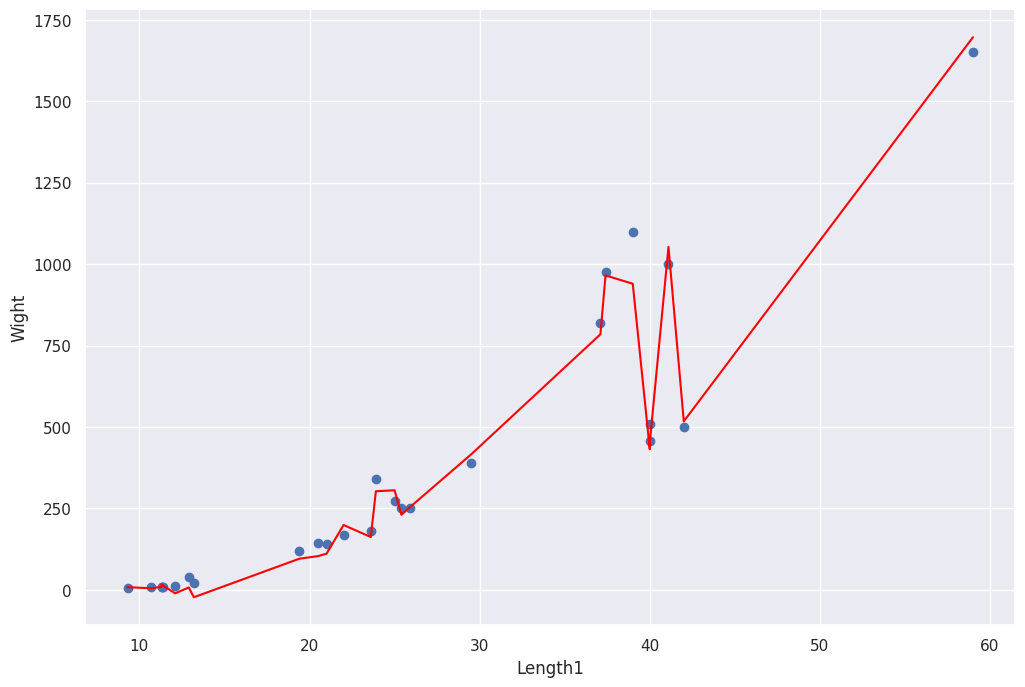

In [46]:
a = final_df["Length1"]
b = final_df.y_test
c = final_df['Length1']
d = final_df.y_pred
plt.scatter(a,b)
plt.plot(c,d,color='red')
plt.xlabel("Length1")
plt.ylabel("Wight")
plt.show()